<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.1 MB/s 


In [2]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
df=pd.read_excel("/content/pv_10.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [5]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	6
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=135,
                                         random_state=RandomState(MT19937) at 0x7FABA36E6C00),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FABA36E6C00, verbose=2)

In [26]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.25, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [27]:
from keras import optimizers

In [28]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/200
58/58 [==============================] - 9s 29ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 2/200
58/58 [==============================] - 1s 11ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 3/200
58/58 [==============================] - 1s 11ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4/200
58/58 [==============================] - 1s 11ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 5/200
58/58 [==============================] - 1s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 6/200
58/58 [==============================] - 1s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/200
58/58 [==============================] - 1s 10ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/200
58/58 [==============================] - 1s 11ms/step - loss: 0.

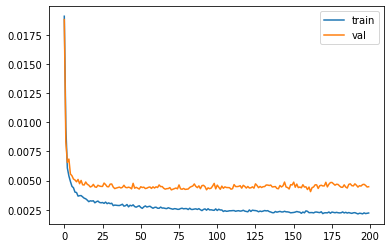

48/48 [==============================] - 2s 3ms/step


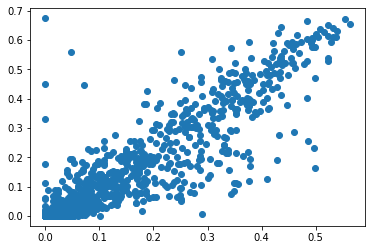

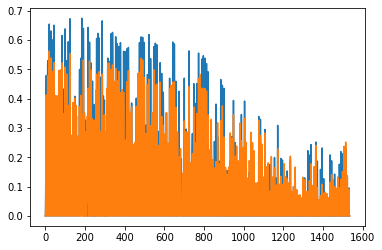

In [29]:
def define_model_():


  # firs
  fe1_0 = LSTM(34, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.3)(fe1_0)
  #fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)
  #fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(12, activation='relu')(fe1_1)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(40, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.4)(fe2_0)
  #fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
  #fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(32, activation='relu')(fe2_1)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 = LSTM(24, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  #fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
  #fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(16, activation='relu')(fe3_1)
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model_()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()

In [30]:
print(np.sqrt(mean_squared_error(y,y_test)))

0.06480116737868322


Epoch 1/200
116/116 [==============================] - 17s 40ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2/200
116/116 [==============================] - 3s 28ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3/200
116/116 [==============================] - 3s 28ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4/200
116/116 [==============================] - 3s 29ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 5/200
116/116 [==============================] - 3s 27ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/200
116/116 [==============================] - 3s 27ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 7/200
116/116 [==============================] - 3s 27ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/200
116/116 [==============================] - 3s 28m

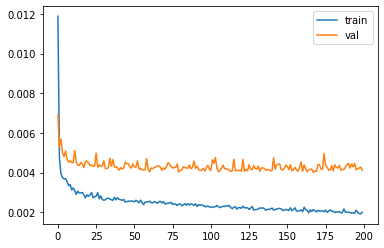

48/48 [==============================] - 2s 7ms/step


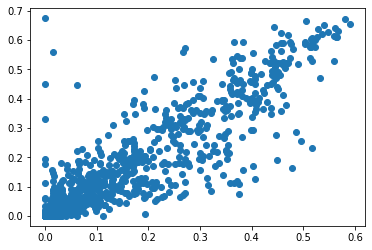

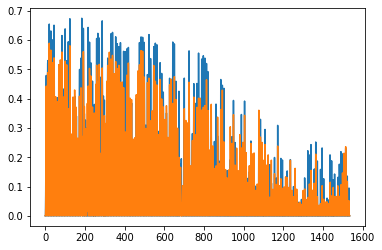

0.06480329852896255


In [19]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.2)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.2)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 32)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))